In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

Duplicate key in file WindowsPath('c:/python/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 255 ('font.size:    10.0')


주제선정 -> 자료수집 ( 공공데이터사이트 ㄱ )

In [2]:
# !pip install plotnine # R에서 하는 방법과 유사하게 시각화한다
# !pip install missingno
from plotnine import *
import missingno as msno

In [3]:
%pwd # 현재 저장 경로

'C:\\k_digital\\python\\dataAnalysis\\workspace'

In [4]:
%ls # 현재 경로의 파일목록
# '$ls 폴더이름'으로 실행하면 현재 소스 프로그램이 위치한 경로 아래의 지정된 파일 목록을 보여준다.


 C 드라이브의 볼륨에는 이름이 없습니다.

파일을 찾을 수 없습니다.



 볼륨 일련 번호: B0B3-0932

 C:\k_digital\python\dataAnalysis\workspace 디렉터리


 C:\k_digital\python\dataAnalysis\workspace 디렉터리


 C:\k_digital\python\dataAnalysis\workspace 디렉터리


 C:\k_digital\python\dataAnalysis\workspace 디렉터리



2015년 10월부터 2023년 6월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향 --
공공데이터포털에서 다운

In [6]:
#read_csv() 메소드 이용
# per_sale = pd.read_csv('./data/전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='euc-kr')
# per_sale = pd.read_csv('./data/전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='cp949')
per_sale = pd.read_csv('./data/전국 신규 민간아파트 분양가격 동향_20230630.csv', encoding='ms949', engine='python')
# encoding 옵션을 지정하지 않고 사용하려면 csv 파일을 메모장으로 열고 파일 메뉴의 다른 이름으로 저장한 후 인코딩을 utf-8로 바꿔서 저장하면 된다.
per_sale

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
7900,제주,모든면적,2023,6,7326
7901,제주,전용면적 60제곱미터이하,2023,6,7381
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,7084
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639


In [7]:
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


dtypes 속성이나 info() 메소드를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하다면 변경한다.

In [8]:
per_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [9]:
per_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


In [10]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다. 
per_sale['연도'] = per_sale['연도'].astype(str)
per_sale.월 = per_sale.월.astype(str)
# 데이터프레임의 특정 열 1개를 얻어올 떄 데이터프레임(열)
per_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [11]:
# 분양가격(제곱미터)는 연산에 사용되므로 숫자로 변경한다.
# pre_sale['분양가격(제곱미터)'] = pre_sale['분양가격(제곱미터)'].astype(float)
# astype(float) : 숫자가 아닌 문자열이 있으면 에러가 발생된다. => to_numeric() 
# to_numeric() : errors 속성의 기본값은 raise : 숫자로 변경할 수 없는 값이 있으면 오류를 발생시킨다.
# ignore : 숫자로 변경할 수 없는 값이 있으면 함수 실행을 무시.

# coerce : 오류가 발생된 데이터를 누락값으로 변경한다.!
per_sale['분양가격(제곱미터)'] = pd.to_numeric(per_sale['분양가격(제곱미터)'], errors='coerce')
# '분양가격(제곱미터)'열에 "6,493"형태로 입력되어 누락값으로 처리되는 문제가 발생되었다.
#  csv 파일을 액셀로 데이터 서식을 변경. 영상 참조

In [12]:
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
dtype: object

In [13]:
# 숫자로 변경된 '분양가격(제곱미터)'열을 이용해서 평당 분양 가격을 계산한 열을 추가한다. 
per_sale['평당분양가격'] = per_sale['분양가격(제곱미터)'] * 3.3
per_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
평당분양가격        float64
dtype: object

In [14]:
per_sale.info() # null 개수 파악 가능   7322 non-null  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         7905 non-null   object 
 1   규모구분        7905 non-null   object 
 2   연도          7905 non-null   object 
 3   월           7905 non-null   object 
 4   분양가격(제곱미터)  7322 non-null   float64
 5   평당분양가격      7322 non-null   float64
dtypes: float64(2), object(4)
memory usage: 370.7+ KB


In [15]:
#전국 신규 민간아파트 분양가격 동향
per_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [36]:
# isnull().sum() 누락값이 존재하는가 확인하기
print(per_sale.isnull().sum())

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    583
평당분양가격        583
dtype: int64


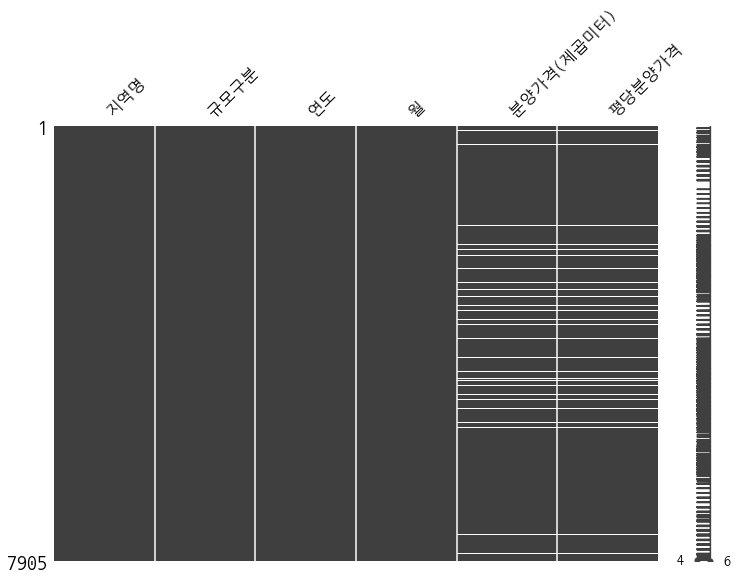

In [16]:
# missingno : 그래프로 누락값 확인하기 => 흰색으로 보이는 부분이 누락값.
msno.matrix(per_sale, figsize=(12,8)) # 그래프 크기
plt.show()

In [38]:
# 2017년 데이터만 추출. 브로드캐스팅-불린인덱싱(2017과 비교해 - True인것만 추출 )
per_sale_2017 = per_sale[per_sale['연도']== '2017'] # 연도는 문자열로 아까 바꿨음.
per_sale_2017

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
1275,서울,모든면적,2017,1,"6,450.0","21,285.0"
1276,서울,전용면적 60제곱미터이하,2017,1,"6,662.0","21,984.6"
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,"6,500.0","21,450.0"
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,"7,030.0","23,199.0"
1279,서울,전용면적 102제곱미터초과,2017,1,"6,771.0","22,344.3"
...,...,...,...,...,...,...
2290,제주,모든면적,2017,12,"3,578.0","11,807.4"
2291,제주,전용면적 60제곱미터이하,2017,12,"5,380.0","17,754.0"
2292,제주,전용면적 60제곱미터초과 85제곱미터이하,2017,12,"3,467.0","11,441.1"
2293,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,12,nan,nan


In [18]:
per_sale['지역명'].value_counts() # 지역별 데이터 수 동일

강원    465
충북    465
대구    465
대전    465
인천    465
경기    465
전남    465
부산    465
제주    465
서울    465
경북    465
울산    465
세종    465
전북    465
충남    465
경남    465
광주    465
Name: 지역명, dtype: int64

In [19]:
per_sale['규모구분'].value_counts() # 규모별 데이터 수 동일

전용면적 102제곱미터초과             1581
전용면적 60제곱미터이하              1581
전용면적 60제곱미터초과 85제곱미터이하     1581
모든면적                       1581
전용면적 85제곱미터초과 102제곱미터이하    1581
Name: 규모구분, dtype: int64

분석시작)

전국 연도별 평균 평당분양가격

In [45]:
# 연도 열로 그룹화 후, 평균평당분양가격 열 출력

per_sale.groupby(per_sale['연도'])['평당분양가격'].mean() # 연도별 평균평당분양가격
# per_sale.groupby(per_sale.연도).평당분양가격.mean() # 같음

연도
2015    9,202.7
2016    9,683.0
2017   10,372.9
2018   10,978.9
2019   12,188.3
2020   13,039.4
2021   13,636.0
2022   14,942.5
2023   16,277.1
Name: 평당분양가격, dtype: float64

In [21]:
# pd.options.display.float_format : 데이터프레임에 지정된 실수 데이터의 출력 서식을 지정. 
pd.options.display.float_format = '{:,.1f}'.format # {:,.1f} : 천단위 콤마, 소수첫째자리까지

In [22]:
per_sale.groupby(per_sale['연도']).describe() # 숫자 데이터 열의 요약 통계량

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   
2022      979.0 4,528.0 1,521.7 2,657.0 3,284.5 4,189.0 5,231.5 10,322.0   
2023      483.0 4,932.5 1,681.5 2,785.0 3,625.0 4,659.0 5,756.0 11,911.0   

     평당분양가격                                                               
      count     mean     std     min      25%      50%      75%      max  
연도                                                                        
2015  243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016  984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017  975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018  919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019  912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020  882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021  945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8  
2022  979.0 14,942.5 5,021.7 8,768.1 10,838.8 13,823.7 17,263.9 34,062.6  
2023  483.0 16,277.1 5,549.1 9,190.5 11,962.5 15,374.7 18,994.8 39,306.3

In [23]:
# 'T' : 행과 열 transform. 
per_sale.groupby(per_sale['연도']).describe().T

연도                   2015     2016     2017     2018     2019     2020  \
분양가격(제곱미터) count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   2,788.7  2,934.2  3,143.3  3,327.0  3,693.4  3,951.3   
           std      976.9  1,071.4  1,110.5  1,186.1  1,563.2  1,632.7   
           min    1,868.0  1,900.0  1,976.0  2,076.0  2,124.0  2,297.0   
           25%    2,225.0  2,282.0  2,373.0  2,525.0  2,635.5  2,780.5   
           50%    2,516.0  2,672.0  2,838.0  2,952.0  3,395.0  3,734.5   
           75%    3,025.5  3,148.5  3,466.0  3,698.0  4,066.2  4,441.0   
           max    7,092.0  8,096.0  7,887.0  8,098.0 12,728.0 13,835.0   
평당분양가격     count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   9,202.7  9,683.0 10,372.9 10,978.9 12,188.3 13,039.4   
           std    3,223.6  3,535.8  3,664.7  3,914.1  5,158.6  5,388.1   
           min    6,164.4  6,270.0  6,520.8  6,850.8  7,009.2  7,580.1   
           25%    7,342.5  7,530.6  7,830.9  8,332.5  8,697.1  9,175.6   
           50%    8,302.8  8,817.6  9,365.4  9,741.6 11,203.5 12,323.8   
           75%    9,984.1 10,390.0 11,437.8 12,203.4 13,418.6 14,655.3   
           max   23,403.6 26,716.8 26,027.1 26,723.4 42,002.4 45,655.5   

연도                   2021     2022     2023  
분양가격(제곱미터) count    945.0    979.0    483.0  
           mean   4,132.1  4,528.0  4,932.5  
           std    1,567.7  1,521.7  1,681.5  
           min    2,409.0  2,657.0  2,785.0  
           25%    3,057.0  3,284.5  3,625.0  
           50%    3,858.0  4,189.0  4,659.0  
           75%    4,539.0  5,231.5  5,756.0  
           max   10,746.0 10,322.0 11,911.0  
평당분양가격     count    945.0    979.0    483.0  
           mean  13,636.0 14,942.5 16,277.1  
           std    5,173.4  5,021.7  5,549.1  
           min    7,949.7  8,768.1  9,190.5  
           25%   10,088.1 10,838.8 11,962.5  
           50%   12,731.4 13,823.7 15,374.7  
           75%   14,978.7 17,263.9 18,994.8  
           max   35,461.8 34,062.6 39,306.3

전국 규모별 연도별 평균 평당 분양 가격

In [44]:
# pivot_table() : pandas로 액셀의 피벗 테이블 형태로 데이터를 출력한다.
# 기존 데이터를 바탕으로 행,열,값 지정해 테이블을 만듦.

# pivot_table(values, index[, columns, aggfunc, fill_value])
# values: # 데이터로 사용할 열
# index: => # 행에 들어갈 열
# columns: =>  # 열에 들어갈 열
# aggfunc: # 데이터 집계함수, 그룹화된 결과에 적용할 함수 지정. mean이 기본값.
# fill_value: NaN을 대체할 데이터. => 주로 0을 사용한다.
per_sale_pivot =per_sale.pivot_table('평당분양가격', '규모구분','연도', aggfunc='median') #Value, index, columns
per_sale_pivot

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
규모구분,,,,,,,,,
모든면적,"7,999.2","8,827.5","9,070.0","9,807.6","11,299.2","11,272.8","12,533.4","13,761.0","15,556.2"
전용면적 102제곱미터초과,"8,877.0","9,051.9","9,952.8","9,645.9","12,972.3","13,622.4","12,680.2","14,305.5","15,097.5"
전용면적 60제곱미터이하,"8,019.0","8,474.4","9,160.8","9,160.8","10,614.4","11,662.2","11,734.8","12,261.1","15,123.9"
전용면적 60제곱미터초과 85제곱미터이하,"8,012.4","8,830.8","8,944.6","9,824.1","11,203.5","11,203.5","12,846.9","14,369.8","15,419.2"
전용면적 85제곱미터초과 102제곱미터이하,"8,523.9","8,867.1","9,504.0","10,121.1","10,715.1","13,076.2","12,929.4","14,602.5","15,374.7"


전국 지역별 평균 평당 분양 가격

In [78]:
per_sale['규모구분']=='모든면적' # 규모구분 열의 모든 데이터를 우항과 비교함.

0        True
1       False
2       False
3       False
4       False
        ...  
7900     True
7901    False
7902    False
7903    False
7904    False
Name: 규모구분, Length: 7905, dtype: bool

In [79]:
# 중요
# 규모구분이 모든면적으로 되어있는, 평당 평균 분양 가격으로 연도별 변동 금액을 살펴보자
region_year_all = per_sale[per_sale['규모구분']=='모든면적'] # 결과가 True인 행만 출력됨.
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
7880,전북,모든면적,2023,6,"3,371.0","11,124.3"
7885,전남,모든면적,2023,6,"3,402.0","11,226.6"
7890,경북,모든면적,2023,6,"3,830.0","12,639.0"
7895,경남,모든면적,2023,6,"3,532.0","11,655.6"


In [80]:
# 피벗 테이블. 값, 행 (인덱스), 열 
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도')
region_year.head()

연도,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역명,,,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [81]:
# pivot_table()에서 기존 index(행)를 데이터로 사용하고 index를 다시 지정하려면 pivot_table()에 
# .reset_index() 함수.
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도').reset_index()
region_year.head()

연도,지역명,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [93]:
print(region_year.columns) # 열 인덱스
print(region_year.columns.name) # 인덱스의 열 이름

# 데이터프레임의 columns 속성 : 전체 컬럼 이름을 일괄적으로 변경.(리스트 형태로 넘겨서)
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년','2022년', '2023년']
print(region_year.columns)
region_year.columns.name = '일련번호' # 인덱스의 열 이름을 변경한다.
region_year.head()

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022년',
       '2023년'],
      dtype='object', name='일련번호')
일련번호
Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년',
       '2022년', '2023년'],
      dtype='object')


일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [94]:
# rename() : 특정 컬럼 이름을 선택해서 변경. 다시 저장해야 반영.
region_year = region_year.rename(columns={'지역': '지역이름'})
region_year.head()

일련번호,지역이름,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [95]:
# inplace=True : 결과를 다시 저장하지 않아도 데이터프레임에 반영한다.
region_year.rename(columns={'지역이름': '지역명'}, inplace=True)
region_year.head()

일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [96]:
# 앞으로 인덱스 연습..

In [97]:
print(list(region_year.index))
# 전체 인덱스 이름을 일괄적으로 변경.
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
print(list(region_year.index))
region_year.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
00,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
01,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
03,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [98]:
# rename() : 특정 인덱스 이름 변경.
region_year.rename(index={'00': '영번째', '01': '첫번째'}, inplace=True)
region_year.head()

일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
영번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
첫번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
03,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


In [99]:
# 특정 인덱스 이름에 접근.
print(region_year.columns[0])
print(region_year.index[0])


지역명
영번째


In [100]:
# rename으로 인덱스 이름 바꾸기 반복문
for i in range(17): 
    region_year.rename(index={region_year.index[i]: i}, inplace=True)
region_year.head()

일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5"


전국 지역별 평균 분양 가격 변동 금액

In [106]:
#파생변수추가
region_year['변동액'] = region_year['2023년'] - region_year['2015년'] 
region_year

일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,변동액
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","10,929.0","12,775.9","5,616.1"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","16,311.9","18,392.5","8,015.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.5","9,870.9","10,160.7","10,505.0","11,723.5","11,807.4","4,221.8"
3,경북,"7,170.9","7,360.7","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","11,605.5","12,500.4","5,329.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","15,148.4","17,033.5","8,981.5"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1","16,508.0","17,206.2","7,973.9"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1","14,010.1","15,856.5","7,758.3"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7","17,918.5","19,643.2","9,336.2"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.4","26,131.0","26,910.1","30,115.2","29,648.0","30,889.6","11,164.4"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.8","11,078.9","11,355.3","12,561.2","11,397.4","12,279.3","3,528.8"


In [114]:
# 변동액이 가장 큰 지역 찾기. np.max
max_delta_price = np.max(region_year['변동액']) * 1000
print(max_delta_price)


# 불린인덱싱으로 행 추출 후 인덱싱.  
sido = region_year[region_year['변동액'] == np.max(region_year['변동액'])]['지역명'].values[0] # 지역명 열의 0행
print(sido)

# {:,.0f} : 천단위 , + 0자리까지 표시
print('2015년부터 2023년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역 {}로 상승액은 평당 {:,.0f}원 이다.'.
      format(sido, max_delta_price))

16144149.999999994
제주
2015년부터 2023년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역 제주로 상승액은 평당 16,144,150원 이다.


In [116]:
# 변동액이 가장 작은 지역 찾기. np.min

min_delta_price = np.min(region_year['변동액']) * 1000 
min_delta_price
sido = region_year[region_year['변동액'] == np.min(region_year['변동액'])].지역명.values[0]
print(sido)
print('2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역 {}로 상승액은 평당 {:,.0f}원 이다.'.
      format(sido, min_delta_price))

세종
2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역 세종로 상승액은 평당 3,528,800원 이다.


In [66]:
mean_delta_price = np.mean(region_year['변동액']) * 1000 # 평균 델타.
mean_delta_price

4813842.647058824

plotnine 라이브러리를 이용한 시각화 : R에서 사용하는 ggplot 사용가능

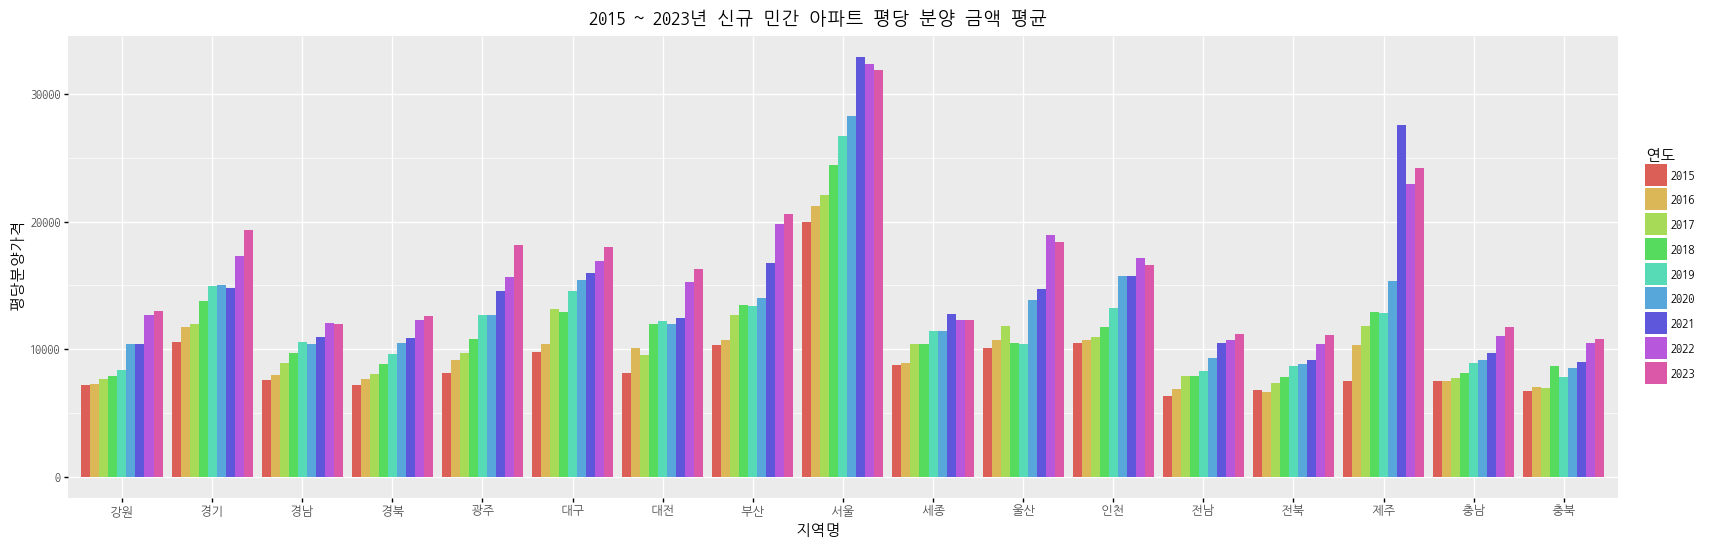

<ggplot: (139330935139)>

In [142]:
# 연도별 평당 분양 금액 평균 시각화
# ggplot(데이터프레임, aes(x=x축, y=y축, fill='범례')) # 차트 배경.
#     + 차트함수() 
#     + 차트속성함수() # 차트 위에 각종 필요한 정보를 표시한다.
( # 괄호 안에 넣음.
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) 
    + geom_bar(stat='identity', position='dodge') # 차트 종류-막대, dodge: 개별막대
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6))  # 글꼴
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액 평균') # 차트 제목
)

In [146]:
# 규모별 지역별 평당 분양 금액 합계 피벗 테이블, reset index하여 행을 뺀다.
per_sale_sum = per_sale.pivot_table('평당분양가격', '규모구분', '지역명', aggfunc='sum').reset_index()
per_sale_sum.columns.name='No'
per_sale_sum

No,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"817,911.6","1,288,613.7","901,098.0","864,623.1","1,106,968.5","1,270,407.6","1,037,840.1","1,277,014.2","2,377,904.1","928,689.3","1,077,103.5","1,221,887.7","785,182.2","760,808.4","1,397,210.1","810,678.0","747,522.6"
1,전용면적 102제곱미터초과,"976,743.9","1,467,358.2","943,222.5","947,136.3","1,096,537.2","1,400,444.1","681,209.1","1,306,057.5","2,315,154.6","854,762.7","758,128.8","1,397,041.8","890,650.2","835,906.5","1,171,014.9","835,144.2","826,593.9"
2,전용면적 60제곱미터이하,"819,898.2","1,337,410.8","887,267.7","846,664.5","978,888.9","1,265,371.8","960,029.4","1,242,057.3","2,444,095.5","714,925.2","925,112.1","1,215,492.3","764,636.4","758,171.7","1,079,697.3","813,516.0","747,535.8"
3,전용면적 60제곱미터초과 85제곱미터이하,"803,203.5","1,285,155.3","896,685.9","862,082.1","1,095,431.7","1,271,222.7","1,033,431.3","1,274,582.1","2,373,538.2","890,310.3","1,081,888.5","1,220,914.2","782,793.0","757,610.7","1,374,390.6","837,421.2","751,271.4"
4,전용면적 85제곱미터초과 102제곱미터이하,"793,976.7","1,392,758.4","1,116,838.8","779,902.2","359,181.9","1,132,639.2","245,094.3","1,251,680.1","2,510,742.3","763,200.9","565,290.0","1,303,991.7","713,433.6","799,751.7","800,141.1","852,396.6","812,407.2"


melt() 메소드

데이터프레임을 깔끔한 데이터로 정리하는데 사용하는 메소드로 지정한 열에 대해서 데이터를 모두 행으로 정리한다.

melt(데이터프레임, id_vars[, value_vars, var_name, value_name])
id_vars: 위치를 그대로 유지할 열 이름을 지정한다. 필수
value_vars: 행으로 위치를 변경할 열 이름을 지정한다. 생략시 전체 열을 대상으로 한다.
var_name: value_vars로 위치를 변경한 열 이름을 지정한다. 생략시 variable가 지정된다.
value_name: value_vars로 위치를 변경한 열의 데이터가 나타나는 열의 이름을 지정한다. 생략시 value가 지정된다.

In [148]:
per_sale_melt = pd.melt(per_sale_sum, '규모구분') # 규모구분 기준으로 나머지 열을 melt
per_sale_melt.rename(columns={'value': '평당분양가격', 'No':'지역명'}, inplace=True)
per_sale_melt

,규모구분,지역명,평당분양가격
0,모든면적,강원,"817,911.6"
1,전용면적 102제곱미터초과,강원,"976,743.9"
2,전용면적 60제곱미터이하,강원,"819,898.2"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"803,203.5"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"793,976.7"
...,...,...,...
80,모든면적,충북,"747,522.6"
81,전용면적 102제곱미터초과,충북,"826,593.9"
82,전용면적 60제곱미터이하,충북,"747,535.8"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"751,271.4"


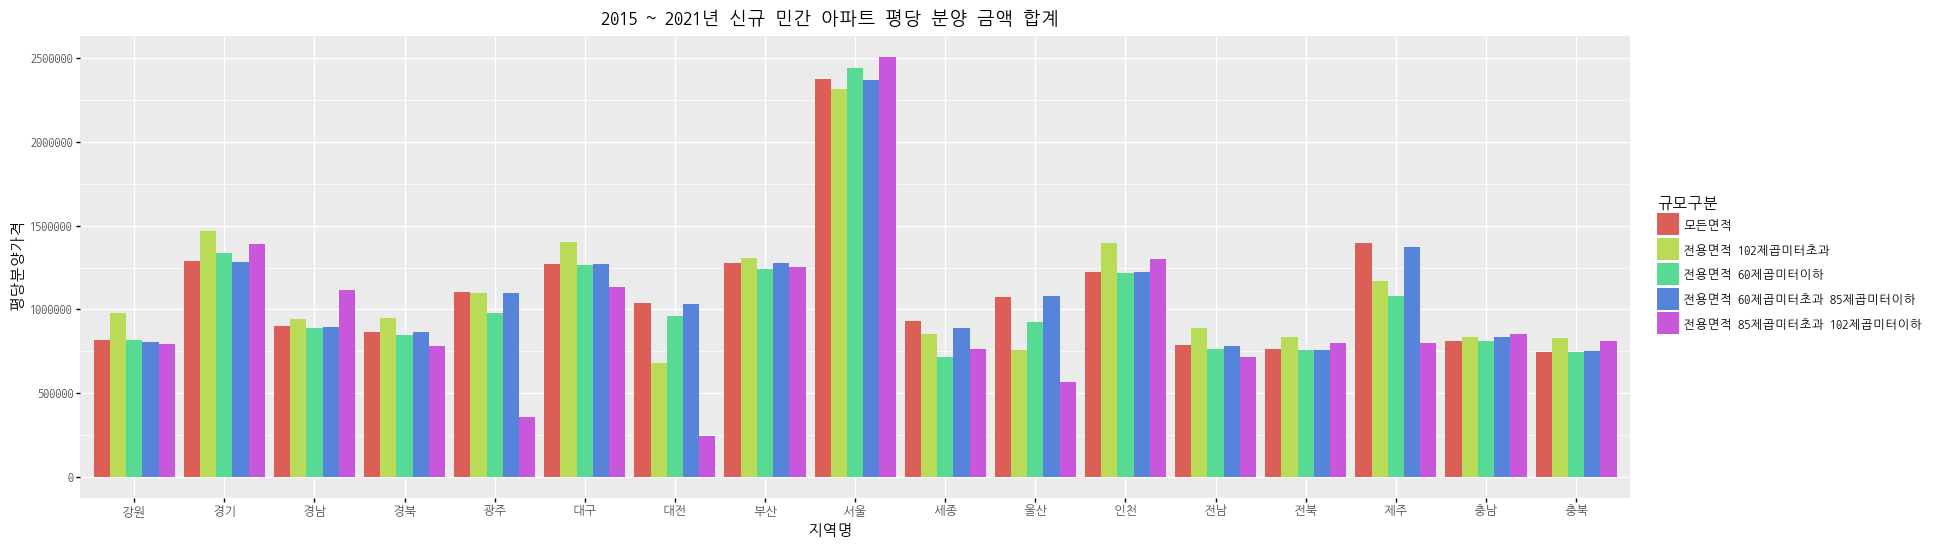

<ggplot: (-9223371897530413294)>

In [124]:
# 규모별 지역별 평당 분양 금액 합계 시각화
(
ggplot(per_sale_melt, aes(x='지역명', y='평당분양가격', fill='규모구분')) 
    + geom_bar(stat='identity', position='dodge') # 누적 막대 그래프 vs 개별
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액 합계')
)

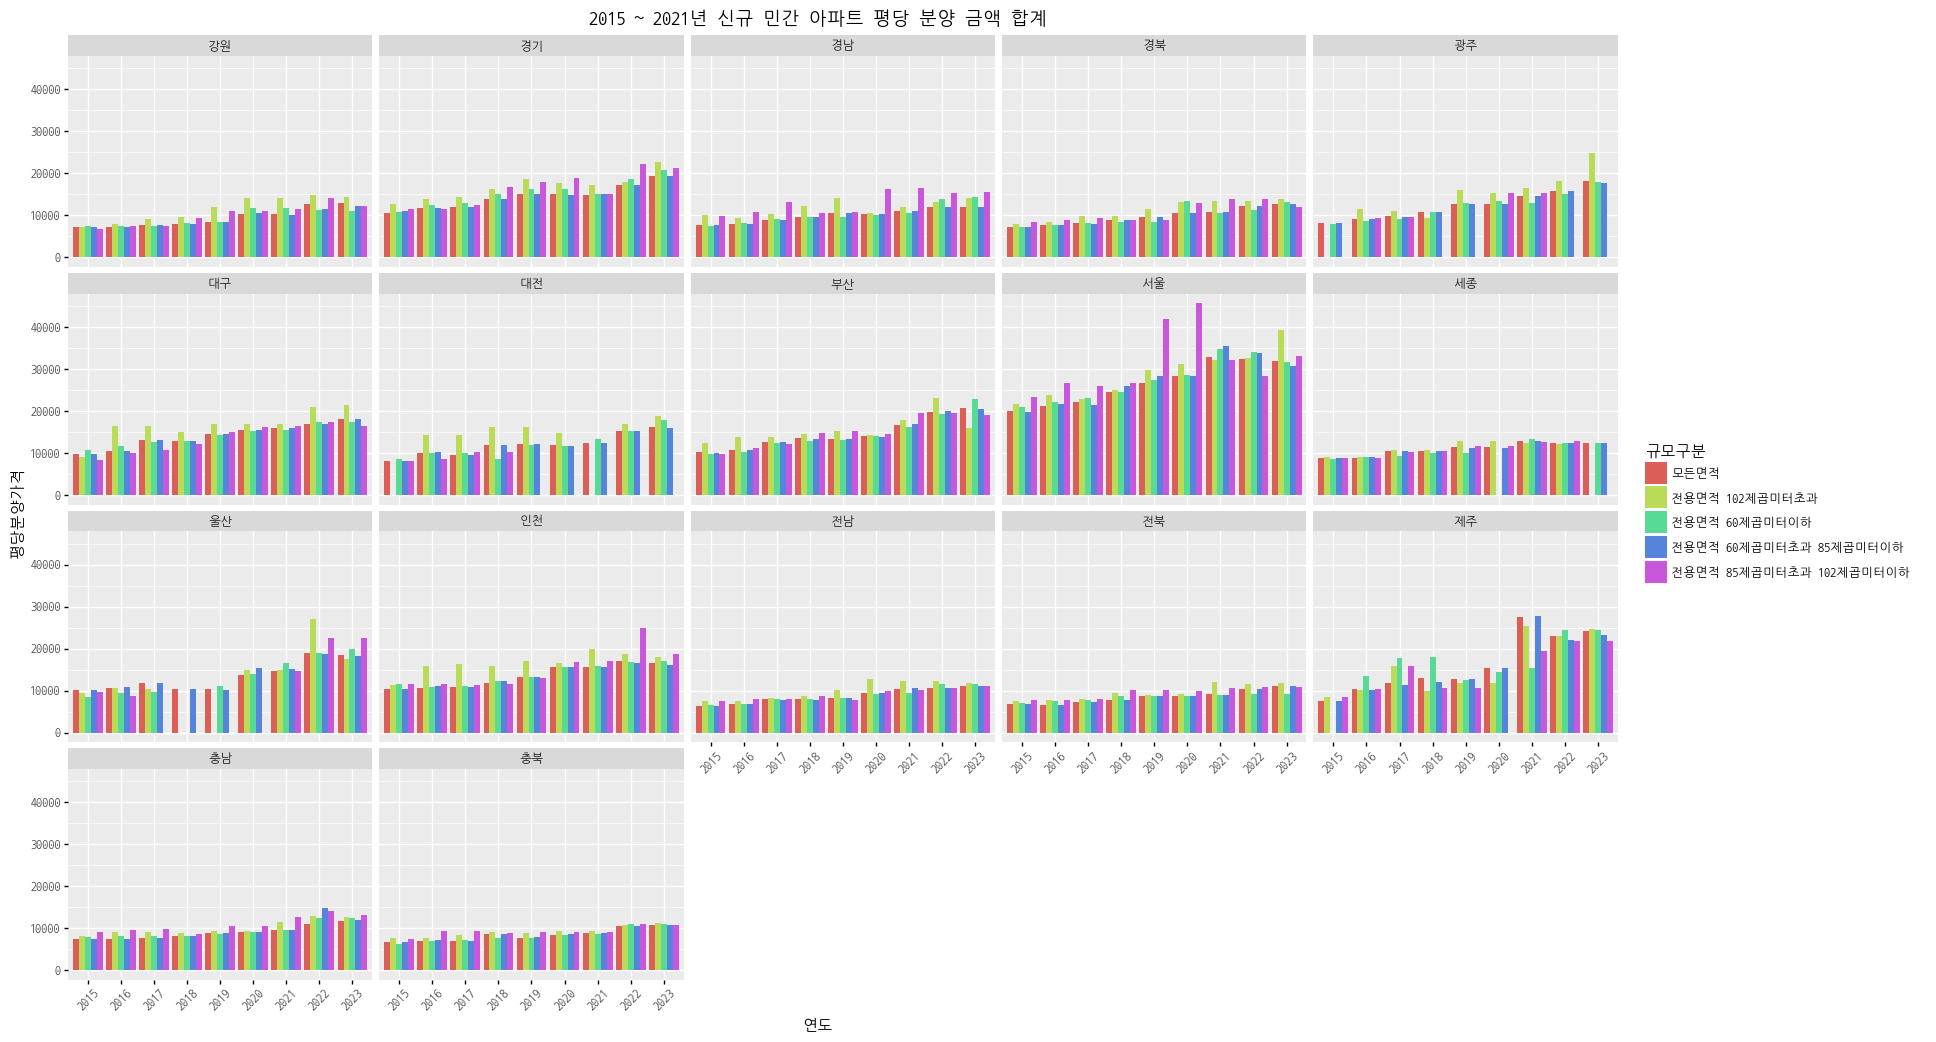

<ggplot: (139322798940)>

In [125]:

(
ggplot(per_sale, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_bar(stat='identity', position='dodge') 
    + facet_wrap('지역명') # 지역별로 보기 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 12), axis_text_x=element_text(rotation=45))  # x축 글자 회전각도
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액 합계')
)

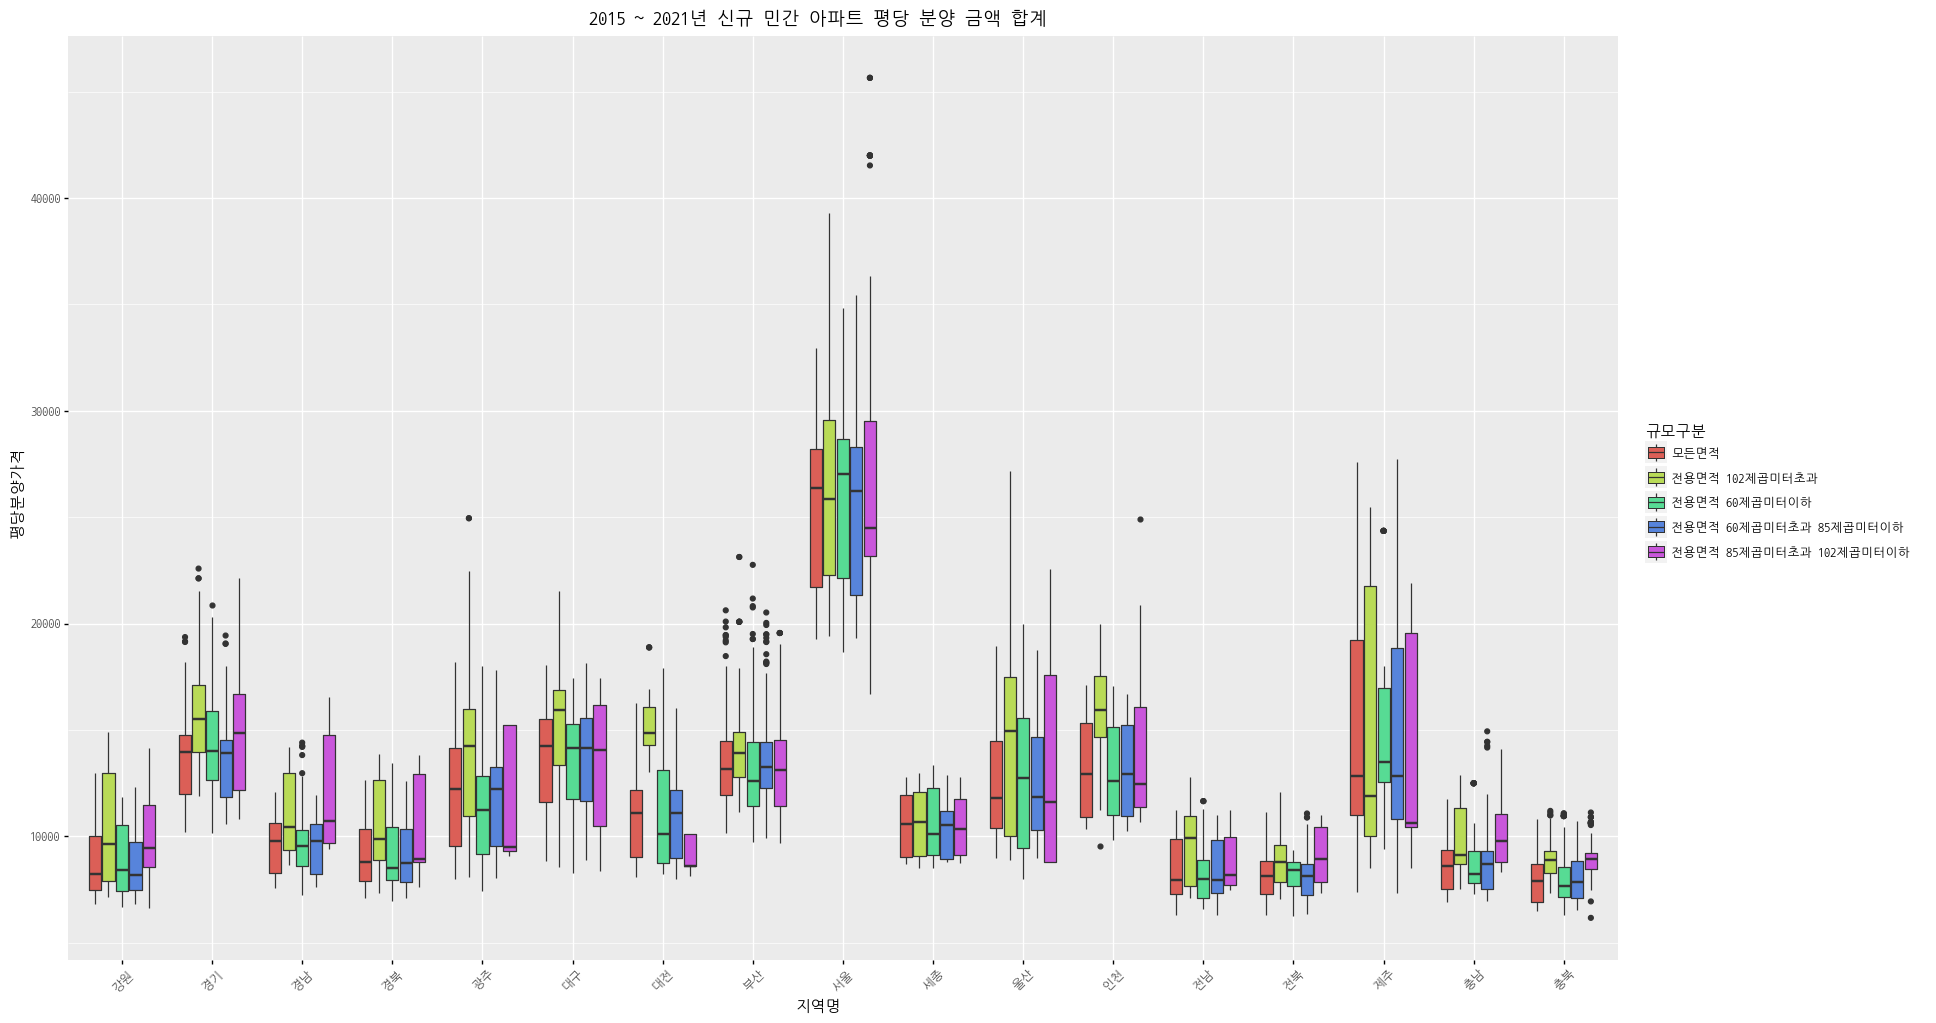

<ggplot: (-9223371897527818608)>

In [127]:
# boxplot : 분포확인. 이상치가 골때린다.
'''
1. 최댓값
제 3사분위수 + (1.5 * IQR값)

2. 최솟값
제 1사분위수 - (1.5 * IQR값)

벗어난 값들은 이상치라고 판단한다.

'''
(
ggplot(per_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 12), axis_text_x=element_text(rotation=45))  
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액 합계')
)

In [135]:
# 서울
per_sale_seoul = per_sale[per_sale['지역명'] == '서울']
per_sale_seoul

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
7820,서울,모든면적,2023,6,"9,675.0","31,927.5"
7821,서울,전용면적 60제곱미터이하,2023,6,"9,555.0","31,531.5"
7822,서울,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"9,325.0","30,772.5"
7823,서울,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"10,057.0","33,188.1"


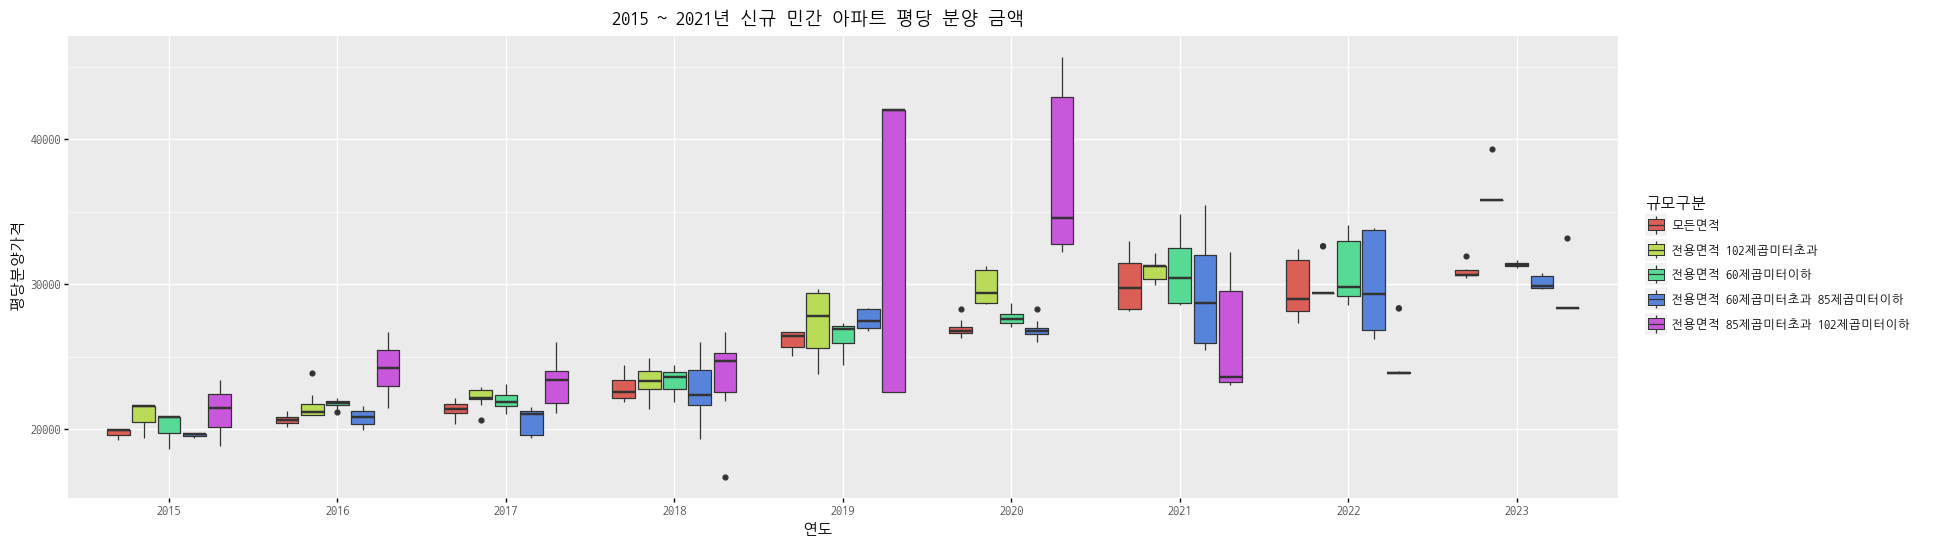

<ggplot: (139327850588)>

In [136]:
(
ggplot(per_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액')
)

In [137]:
# 제주
per_sale_jeju = per_sale[per_sale['지역명'] == '제주']
per_sale_jeju

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
80,제주,모든면적,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60제곱미터이하,2015,10,nan,nan
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
7900,제주,모든면적,2023,6,"7,326.0","24,175.8"
7901,제주,전용면적 60제곱미터이하,2023,6,"7,381.0","24,357.3"
7902,제주,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"7,084.0","23,377.2"
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,"6,639.0","21,908.7"


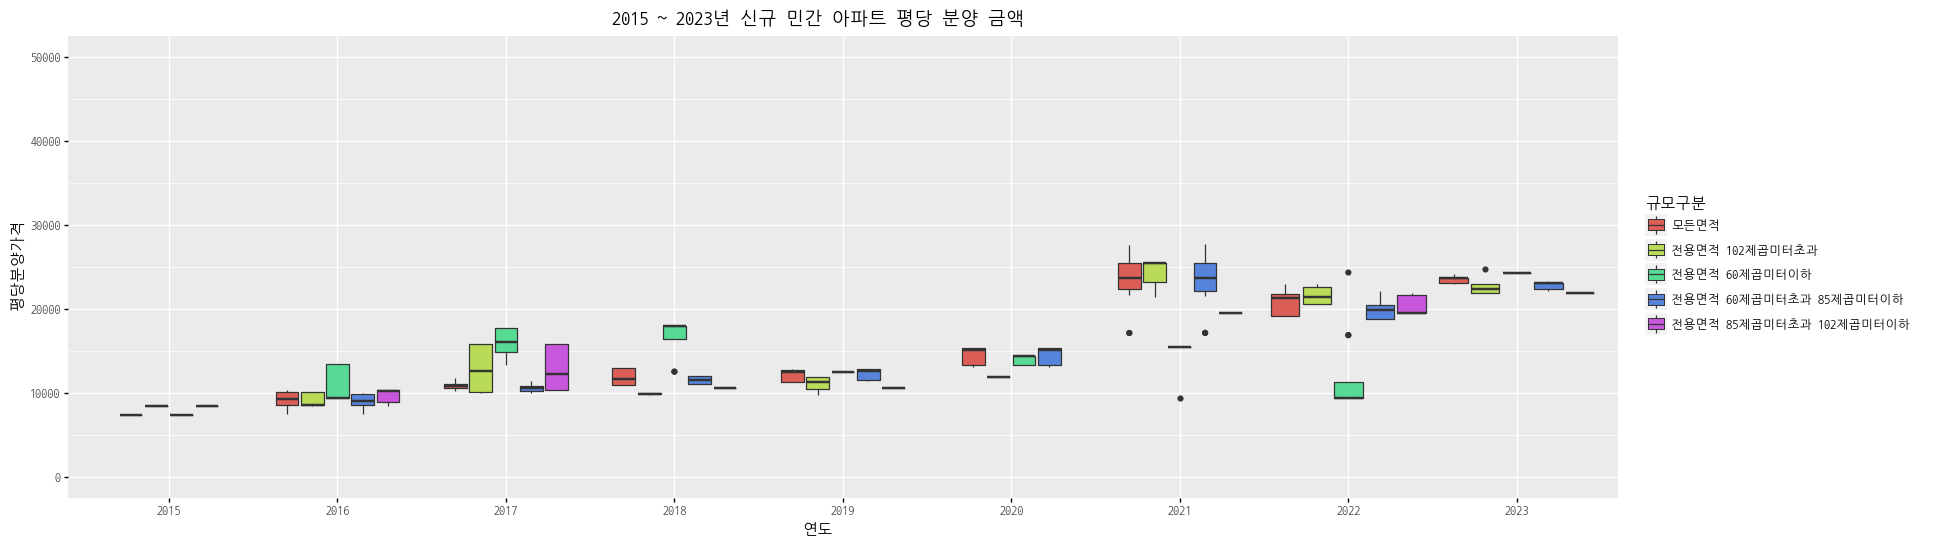

<ggplot: (139324633748)>

In [139]:
(
ggplot(per_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액')
    + scale_y_continuous(limits=(0, 50000))
)

In [140]:
# 상승액이 가장 적은 세종
per_sale_sejong = per_sale[per_sale['지역명'] == '세종']
per_sale_sejong

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
40,세종,모든면적,2015,10,"2,642.0","8,718.6"
41,세종,전용면적 60제곱미터이하,2015,10,"2,572.0","8,487.6"
42,세종,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,657.0","8,768.1"
43,세종,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,644.0","8,725.2"
44,세종,전용면적 102제곱미터초과,2015,10,"2,692.0","8,883.6"
...,...,...,...,...,...,...
7860,세종,모든면적,2023,6,"3,721.0","12,279.3"
7861,세종,전용면적 60제곱미터이하,2023,6,"3,724.0","12,289.2"
7862,세종,전용면적 60제곱미터초과 85제곱미터이하,2023,6,"3,717.0","12,266.1"
7863,세종,전용면적 85제곱미터초과 102제곱미터이하,2023,6,nan,nan


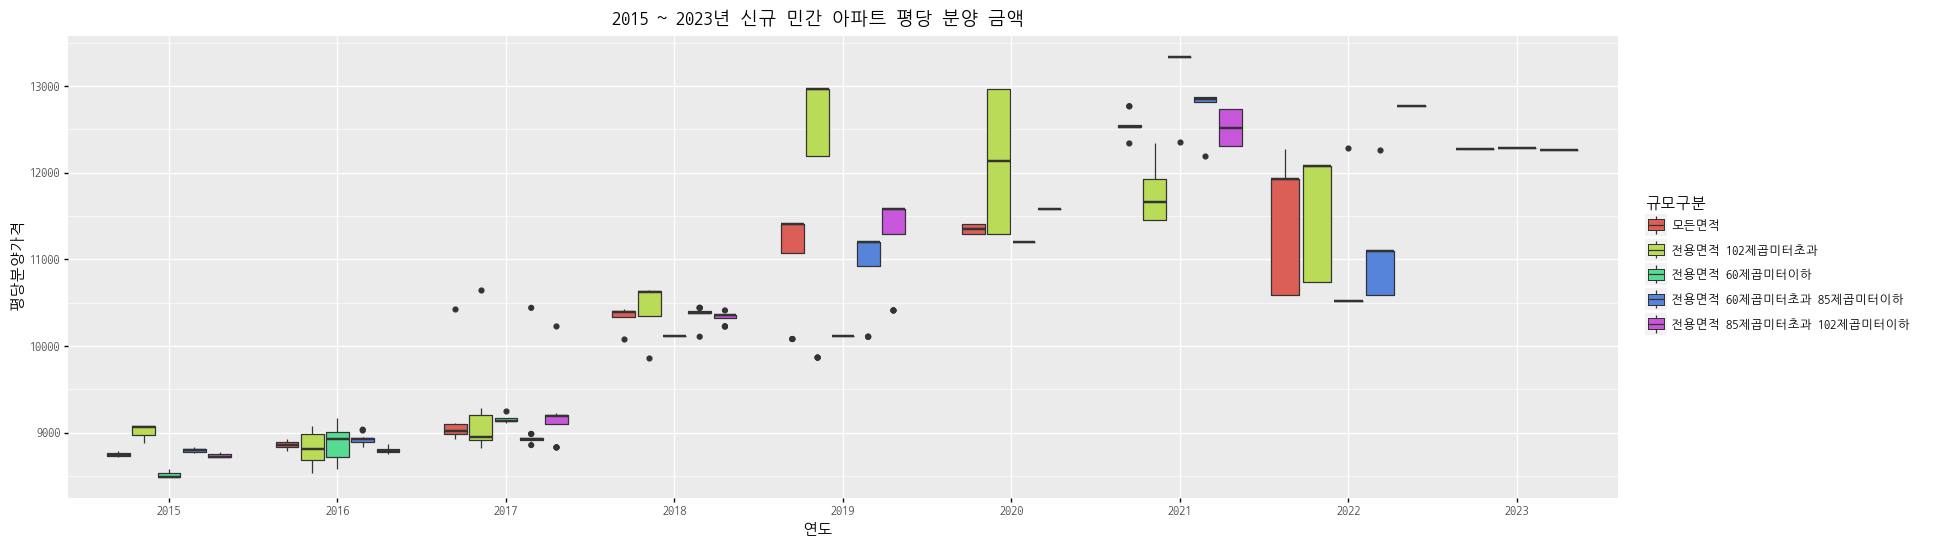

<ggplot: (139326953031)>

In [141]:
(
ggplot(per_sale_sejong, aes(x='연도', y='평당분양가격', fill='규모구분')) 
    + geom_boxplot() 
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20, 6)) 
    + ggtitle('2015 ~ 2023년 신규 민간 아파트 평당 분양 금액')
#     + scale_y_continuous(limits=(0, 50000))
)